# Dataset analyse
## Data counts

In [10]:
import pandas as pd

import dataset
import matplotlib.pyplot as plt

retail_dataset = dataset.Dataset("retail.csv")
print(retail_dataset.df.count())
retail_dataset.handle_missing_or_wrong_values()
print()
print(retail_dataset.df.count())

Invoice        1067371
StockCode      1067371
Description    1062989
Quantity       1067371
InvoiceDate    1067371
Price          1067371
Customer ID     824364
Country        1067371
dtype: int64

Invoice        805426
StockCode      805426
Description    805426
Quantity       805426
InvoiceDate    805426
Price          805426
Customer ID    805426
Country        805426
dtype: int64


## Over time
A plot for every hour of the day with how many products are sold


Relative sales weekdays: 185542.6
Relative sales weekends: 69829.0


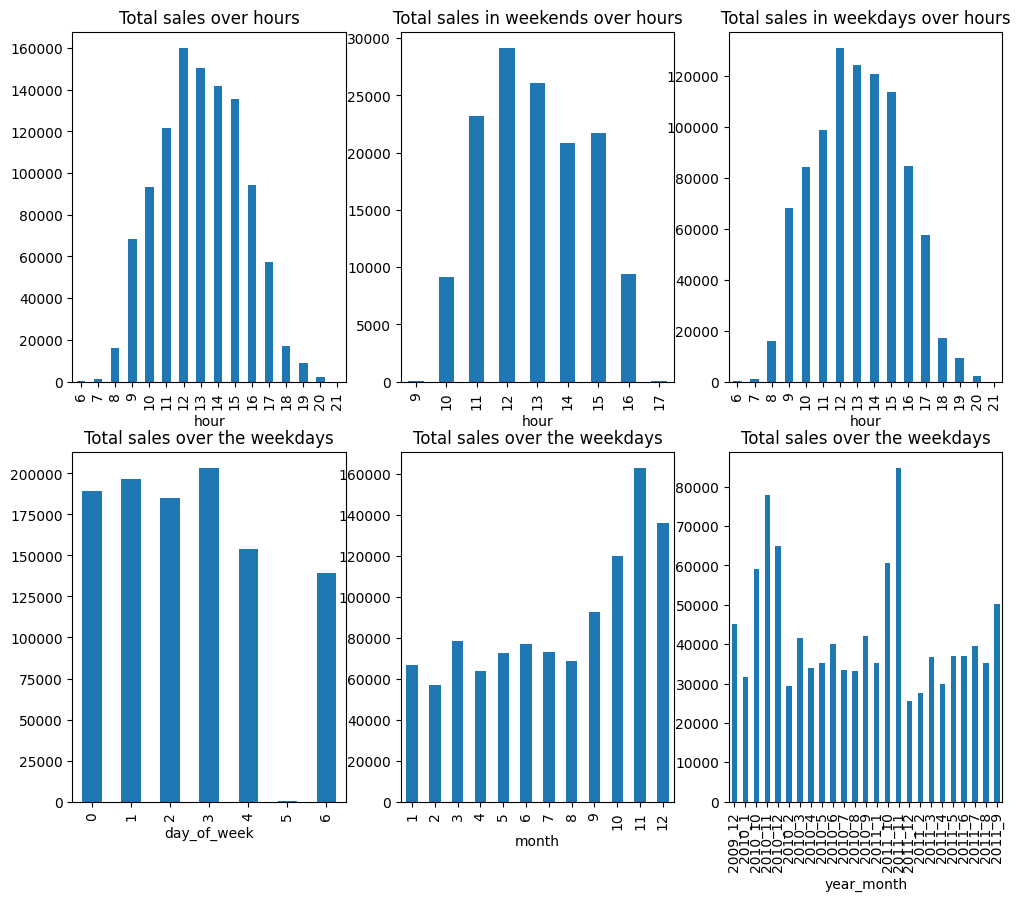

In [11]:
retail_dataset = dataset.Dataset("retail.csv")
#retail_dataset.handle_missing_or_wrong_values()
retail_dataset.df['hour'] = retail_dataset.df['InvoiceDate'].apply(lambda date: date.hour)
retail_dataset.df['day_of_week'] = retail_dataset.df['InvoiceDate'].apply(lambda date: date.day_of_week)
retail_dataset.df['month'] = retail_dataset.df['InvoiceDate'].apply(lambda date: date.month)
retail_dataset.df['year_month'] = retail_dataset.df['InvoiceDate'].apply(lambda date: f"{date.year}_{date.month}")

fig, axes = plt.subplots(2, 3, figsize=(12, 10))

retail_dataset.df['hour'].value_counts().sort_index().plot(kind='bar', title='Total sales over hours', ax=axes[0,0])
retail_dataset.df[retail_dataset.df['InvoiceDate'].dt.day_of_week >= 5]['hour'].value_counts().sort_index().plot(kind='bar', title='Total sales in weekends over hours', ax=axes[0,1])
retail_dataset.df[retail_dataset.df['InvoiceDate'].dt.day_of_week < 5]['hour'].value_counts().sort_index().plot(kind='bar', title='Total sales in weekdays over hours', ax=axes[0,2])

retail_dataset.df['day_of_week'].value_counts().sort_index().plot(kind='bar', title='Total sales over the weekdays', ax=axes[1,0])

retail_dataset.df['month'].value_counts().sort_index().plot(kind='bar', title='Total sales over the weekdays', ax=axes[1,1])

retail_dataset.df['year_month'].value_counts().sort_index().plot(kind='bar', title='Total sales over the weekdays', ax=axes[1,2])

print("Relative sales weekdays:", retail_dataset.df[retail_dataset.df['InvoiceDate'].dt.day_of_week < 5].count()["StockCode"] / 5)
print("Relative sales weekends:", retail_dataset.df[retail_dataset.df['InvoiceDate'].dt.day_of_week >= 5].count()["StockCode"] / 2)

### Result analyzes
When we look at the graph we can conclude following things
The sales of products over the day is normally distributed around 12u for weekdays and weekend days
  - Some more unexpected results are that people buy earlier and later on weekdays than on weekends.
  - There is also more sold on weekdays dan on weekend days (if we look relative on a per day basis)
  - An other unexpected result is that on saturday (day 5) there are almost no sales, witch is quite unexpected for an e-commerce store
  - When we look at our per month we see an increase at the end of the year, this is expected because around this moment in the year there is a lot of shopping going on for the holidays
  - When we look at our year_month plot we can see this recurring increase at the end of the year



# Data categorization
To know how to categorize the data we will first plot the values to get an idea of how our data is distributed

## Price distribution

[0.00000e+00 1.25000e+00 1.95000e+00 3.75000e+00 1.09535e+04]
priceCat
very cheap    280347
normal        205922
expensive     175497
cheap         143660
Name: count, dtype: int64
max 10953.5
min 0.0
mean 3.2061238499874607
median 1.95


<Axes: title={'center': 'Price per catergory'}, xlabel='price', ylabel='sales'>

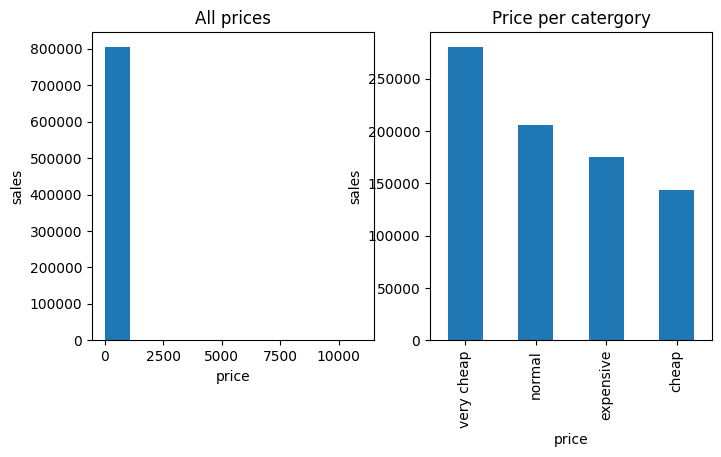

In [12]:
retail_dataset = dataset.Dataset("retail.csv")
retail_dataset.handle_missing_or_wrong_values()
#retail_dataset.categorize_data()

bins = [0, 5, 50, 100, float('inf')]
labels = ["very cheap", "cheap", "normal", "expensive"]
retail_dataset.df['priceCat'], retbins = pd.qcut(retail_dataset.df['Price'], retbins=True, labels=labels, q=4)
print(retbins)
print(retail_dataset.df['priceCat'].value_counts())

print("max", retail_dataset.df['Price'].max())
print("min", retail_dataset.df['Price'].min())
print("mean", retail_dataset.df['Price'].mean())
print("median", retail_dataset.df['Price'].median())

fig, axes = plt.subplots(1,2, figsize=(8, 4))

limited_information =  retail_dataset.df
limited_information['Price'].plot(kind='hist', title='All prices', ax=axes[0], xlabel="price", ylabel="sales")
retail_dataset.df['priceCat'].value_counts().plot(kind='bar', title='Price per catergory', ax=axes[1], xlabel="price", ylabel="sales")



## Quantity distribution

[1.0000e+00 2.0000e+00 1.0000e+01 7.4215e+04]
quantityCat
normal    283491
small     271523
many      250412
Name: count, dtype: int64
max 74215
min 1
mean 13.20372076391872
median 5.0


<Axes: title={'center': 'Quantities per catergory'}, xlabel='quantity', ylabel='sales'>

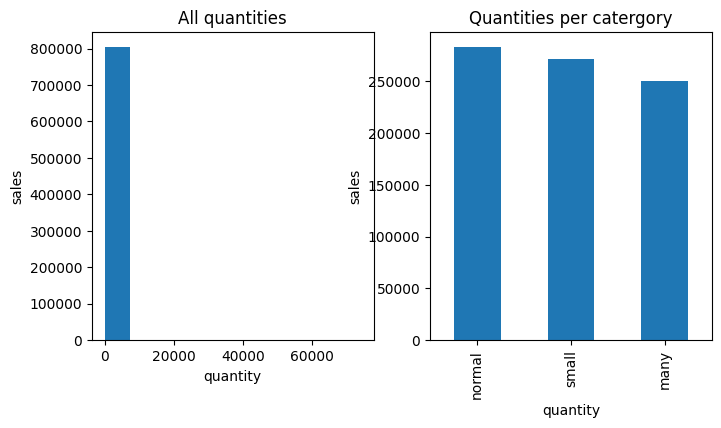

In [13]:
retail_dataset = dataset.Dataset("retail.csv")
retail_dataset.handle_missing_or_wrong_values()
#retail_dataset.categorize_data()

labels = ["small", "normal", "many"]
retail_dataset.df['quantityCat'], retbins = pd.qcut(retail_dataset.df['Quantity'], retbins=True, labels=labels, q=3)
print(retbins)
print(retail_dataset.df['quantityCat'].value_counts())

print("max", retail_dataset.df['Quantity'].max())
print("min", retail_dataset.df['Quantity'].min())
print("mean", retail_dataset.df['Quantity'].mean())
print("median", retail_dataset.df['Quantity'].median())

fig, axes = plt.subplots(1,2, figsize=(8, 4))

limited_information =  retail_dataset.df
limited_information['Quantity'].plot(kind='hist', title='All quantities', ax=axes[0], xlabel="quantity", ylabel="sales")
retail_dataset.df['quantityCat'].value_counts().plot(kind='bar', title='Quantities per catergory', ax=axes[1], xlabel="quantity", ylabel="sales")


## Time categorization

max 2011-12-09 12:50:00
min 2009-12-01 07:45:00
mean 2011-01-02 21:13:55.394028544
median 2010-12-07 15:28:00
InvoiceDateCat
time:12:00-15:59 []    586976
time:06:00-11:59 []    300505
time:16:00-18:59 []    168595
time:19:00-24:00 []     11295
Name: count, dtype: int64


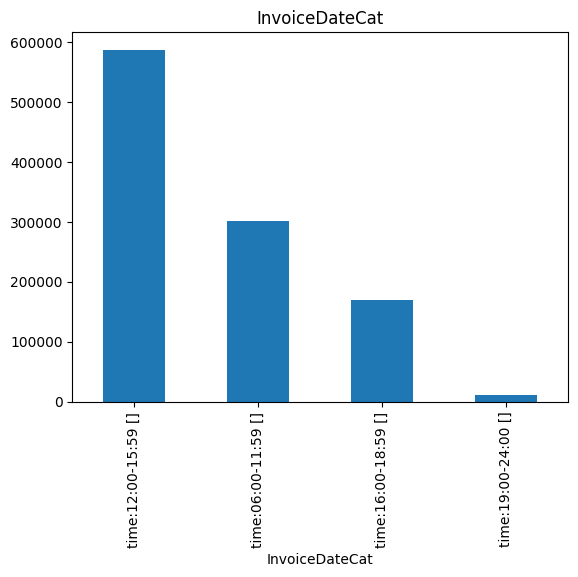

In [14]:
retail_dataset = dataset.Dataset("retail.csv")
#retail_dataset.handle_missing_or_wrong_values()
retail_dataset.categorize_data()

print("max", retail_dataset.df['InvoiceDate'].max())
print("min", retail_dataset.df['InvoiceDate'].min())
print("mean", retail_dataset.df['InvoiceDate'].mean())
print("median", retail_dataset.df['InvoiceDate'].median())

#fig, axes = plt.subplots(2, 3)

limited_information =  retail_dataset.df
limited_information['InvoiceDateCat'].value_counts().plot(kind='bar', title='InvoiceDateCat')

print(limited_information['InvoiceDateCat'].value_counts())


# Association rules


## First we will try out different configurations for featurs

In [15]:
from apyori import apriori
from dataset import Dataset

def print_association_rules(association_results):
    association_results = sorted(association_results, key=lambda rule: (-rule.ordered_statistics[0].confidence, -rule.support))
    for item in association_results:
        pair = item.items  # The product combinations
        support = item.support  # Support value

        ordered_statistics = item.ordered_statistics[0]  # First rule (can iterate if needed)
        base_items = ordered_statistics.items_base  # LHS (if A, then B)
        add_items = ordered_statistics.items_add  # RHS (then B)
        confidence = ordered_statistics.confidence  # Confidence score
        lift = ordered_statistics.lift  # Lift metric
        print([x for x in base_items], " -> ", [x for x in add_items], " | ", f"confidence: {confidence:.2f}, support: {support:.5f}, lift: {lift:.2f}")

def association_rule(features, min_support, min_confidence, min_lift):
    print(f"=== {features} ===")
    orders_depending_on_invoice = list(dataset.df[features].itertuples(index=False, name=None))
    print(f"Total order count: {len(orders_depending_on_invoice)}")
    print(f"Support: {min_support} ({len(orders_depending_on_invoice) * min_support} items needed)")
    print(f"Confidence: {len(orders_depending_on_invoice)}")
    print(f"Total order count: {len(orders_depending_on_invoice)}")
    association_results = list(apriori(orders_depending_on_invoice, min_support=min_support, min_confidence=min_confidence, min_lift=min_lift))
    print_association_rules(association_results)

dataset = Dataset("retail.csv")
dataset.handle_missing_or_wrong_values()
dataset.categorize_data()
dataset.keep_last_x_items(100000)
dataset.df = dataset.df.astype(str)

association_rule(["quantityCat", "priceCat", "Customer ID"], 0.001, 0.5, 2)
association_rule(["Description", "quantityCat"], 0.001, 0.5, 2)
association_rule(["Description", "InvoiceDateCat"], 0.001, 0.3, 1)


=== ['quantityCat', 'priceCat', 'Customer ID'] ===
Total order count: 100000
Support: 0.001 (100.0 items needed)
Confidence: 100000
Total order count: 100000
['18139.0']  ->  ['many']  |  confidence: 1.00, support: 0.00159, lift: 3.57
['small', '14911.0']  ->  ['extremely_expensive']  |  confidence: 1.00, support: 0.00155, lift: 4.92
['17511.0']  ->  ['many']  |  confidence: 0.96, support: 0.00209, lift: 3.42
['13408.0']  ->  ['many']  |  confidence: 0.94, support: 0.00100, lift: 3.37
['extremely_expensive', '12748.0']  ->  ['small']  |  confidence: 0.94, support: 0.00284, lift: 2.47
['16005.0']  ->  ['small']  |  confidence: 0.94, support: 0.00117, lift: 2.46
['13081.0', 'cheap']  ->  ['many']  |  confidence: 0.93, support: 0.00127, lift: 3.33
['cheap', '14911.0']  ->  ['many']  |  confidence: 0.93, support: 0.00441, lift: 3.33
['15872.0']  ->  ['small']  |  confidence: 0.92, support: 0.00118, lift: 2.43
['15436.0']  ->  ['small']  |  confidence: 0.90, support: 0.00179, lift: 2.37
['1

## Effect minimum support and minimum confidence

## Association rules between descriptions
Association to recommend products based on invoices

In [16]:
from apyori import apriori
from dataset import Dataset

def print_association_rules(association_results):
    association_results = sorted(association_results, key=lambda rule: (-rule.ordered_statistics[0].confidence, -rule.support))
    for item in association_results:
        pair = item.items  # The product combinations
        support = item.support  # Support value

        print(f"-------{pair}--------")
        for ordered_statistics in item.ordered_statistics:
            base_items = ordered_statistics.items_base  # LHS (if A, then B)
            add_items = ordered_statistics.items_add  # RHS (then B)
            confidence = ordered_statistics.confidence  # Confidence score
            lift = ordered_statistics.lift  # Lift metric
            print([x for x in base_items], " -> ", [x for x in add_items], " | ", f"confidence: {confidence:.2f}, support: {support:.2f}, lift: {lift:.2f}")
        print("----------------")

dataset = Dataset("retail.csv")
dataset.handle_missing_or_wrong_values()
dataset.categorize_data()
dataset.keep_last_x_items(100000)

SUPPORT = 0.025
CONFIDENCE = 0.7
MIN_LIFT = 2

print("=== products often bought tougher ===")
orders_depending_on_invoice = dataset.get_grouped_data("Invoice", "Description")
print(f"Total order count: {len(orders_depending_on_invoice)}")
print(f"Support: {SUPPORT} ({len(orders_depending_on_invoice) * SUPPORT} items needed)")
print(f"Confidence: {len(orders_depending_on_invoice)}")
print(f"Total order count: {len(orders_depending_on_invoice)}")
association_results = list(apriori(orders_depending_on_invoice, min_support=SUPPORT, min_confidence=CONFIDENCE, min_lift=MIN_LIFT))
print_association_rules(association_results)


=== products often bought tougher ===
Total order count: 4143
Support: 0.025 (103.575 items needed)
Confidence: 4143
Total order count: 4143
-------frozenset({'WOODEN STAR CHRISTMAS SCANDINAVIAN', 'WOODEN HEART CHRISTMAS SCANDINAVIAN', 'WOODEN TREE CHRISTMAS SCANDINAVIAN'})--------
['WOODEN HEART CHRISTMAS SCANDINAVIAN', 'WOODEN TREE CHRISTMAS SCANDINAVIAN']  ->  ['WOODEN STAR CHRISTMAS SCANDINAVIAN']  |  confidence: 0.90, support: 0.03, lift: 12.87
['WOODEN STAR CHRISTMAS SCANDINAVIAN', 'WOODEN TREE CHRISTMAS SCANDINAVIAN']  ->  ['WOODEN HEART CHRISTMAS SCANDINAVIAN']  |  confidence: 0.78, support: 0.03, lift: 11.69
----------------
-------frozenset({'WOODEN STAR CHRISTMAS SCANDINAVIAN', 'WOODEN TREE CHRISTMAS SCANDINAVIAN'})--------
['WOODEN TREE CHRISTMAS SCANDINAVIAN']  ->  ['WOODEN STAR CHRISTMAS SCANDINAVIAN']  |  confidence: 0.85, support: 0.03, lift: 12.12
----------------
-------frozenset({'BAKING SET 9 PIECE RETROSPOT ', 'BAKING SET SPACEBOY DESIGN'})--------
['BAKING SET SPA

Association rules between products and quantities

In [17]:
def print_association_rules(association_results):
    for item in association_results:
        pair = item.items  # The product combinations
        support = item.support  # Support value

        ordered_statistics = item.ordered_statistics[0]  # First rule (can iterate if needed)
        base_items = ordered_statistics.items_base  # LHS (if A, then B)
        add_items = ordered_statistics.items_add  # RHS (then B)
        confidence = ordered_statistics.confidence  # Confidence score
        lift = ordered_statistics.lift  # Lift metric
        print([x for x in base_items], " -> ", [x for x in add_items], " | ", f"confidence: {confidence:.2f}, support: {support:.2f}, lift: {lift:.2f}")

dataset = Dataset("retail.csv")
dataset.handle_missing_or_wrong_values()
dataset.categorize_data()
dataset.keep_last_x_items(100000)

SUPPORT = 0.001
CONFIDENCE = 0.4
MIN_LIFT = 1.5

print("=== products often bought tougher ===")
orders_depending_on_invoice = list(dataset.df[["Description", "quantityCat"]].itertuples(index=False, name=None))
print(f"Total order count: {len(orders_depending_on_invoice)}")
print(f"Support: {SUPPORT} ({len(orders_depending_on_invoice) * SUPPORT} items needed)")
print(f"Confidence: {len(orders_depending_on_invoice)}")
print(f"Total order count: {len(orders_depending_on_invoice)}")
association_results = list(apriori(orders_depending_on_invoice, min_support=SUPPORT, min_confidence=CONFIDENCE, min_lift=MIN_LIFT))
print_association_rules(association_results)

=== products often bought tougher ===
Total order count: 100000
Support: 0.001 (100.0 items needed)
Confidence: 100000
Total order count: 100000
['60 CAKE CASES VINTAGE CHRISTMAS']  ->  ['many']  |  confidence: 0.53, support: 0.00, lift: 1.91
['ALARM CLOCK BAKELIKE GREEN']  ->  ['normal']  |  confidence: 0.52, support: 0.00, lift: 1.53
['ALARM CLOCK BAKELIKE RED ']  ->  ['normal']  |  confidence: 0.56, support: 0.00, lift: 1.66
['ANTIQUE SILVER T-LIGHT GLASS']  ->  ['many']  |  confidence: 0.73, support: 0.00, lift: 2.60
['ASSORTED COLOUR BIRD ORNAMENT']  ->  ['many']  |  confidence: 0.47, support: 0.00, lift: 1.67
['BAKING SET 9 PIECE RETROSPOT ']  ->  ['normal']  |  confidence: 0.57, support: 0.00, lift: 1.69
['BLUE HARMONICA IN BOX ']  ->  ['many']  |  confidence: 0.54, support: 0.00, lift: 1.92
['CHRISTMAS CRAFT LITTLE FRIENDS']  ->  ['normal']  |  confidence: 0.51, support: 0.00, lift: 1.50
['CHRISTMAS CRAFT TREE TOP ANGEL']  ->  ['normal']  |  confidence: 0.53, support: 0.00, lif

## Association rules categories and time categories

In [18]:
SUPPORT = 0.02
CONFIDENCE = 0.8
MIN_LIFT = 1.5

def print_time_slot_association_rules(association_results):
    for item in association_results:
        pair = item.items  # The product combinations
        support = item.support  # Support value

        ordered_statistics = item.ordered_statistics[0]  # First rule (can iterate if needed)
        base_items = ordered_statistics.items_base  # LHS (if A, then B)
        add_items = ordered_statistics.items_add  # RHS (then B)
        confidence = ordered_statistics.confidence  # Confidence score
        lift = ordered_statistics.lift  # Lift metric

        contains_item = False
        for item in pair:
            if "time:" in item:
                contains_item = True

        if contains_item:
            print([x for x in base_items], " -> ", [x for x in add_items], " | ", f"confidence: {confidence:.2f}, support: {support:.2f}, lift: {lift:.2f}")

print("=== products often bought tougher ===")
orders_depending_on_invoice = dataset.df.groupby('Customer ID').apply(lambda x: list(x['InvoiceDateCat'].unique()) + list(x['Description'].unique())).tolist()

print(f"Total order count: {len(orders_depending_on_invoice)}")
print(f"Support: {SUPPORT} ({len(orders_depending_on_invoice) * SUPPORT} items needed)")
print(f"Confidence: {len(orders_depending_on_invoice)}")
print(f"Total order count: {len(orders_depending_on_invoice)}")
association_results = list(apriori(orders_depending_on_invoice, min_support=SUPPORT, min_confidence=CONFIDENCE, min_lift=MIN_LIFT))
print_time_slot_association_rules(association_results)

=== products often bought tougher ===


/tmp/ipykernel_7555/4220124145.py:25: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  orders_depending_on_invoice = dataset.df.groupby('Customer ID').apply(lambda x: list(x['InvoiceDateCat'].unique()) + list(x['Description'].unique())).tolist()


Total order count: 2157
Support: 0.02 (43.14 items needed)
Confidence: 2157
Total order count: 2157
['time:12:00-15:59 []', 'ALARM CLOCK BAKELIKE CHOCOLATE']  ->  ['ALARM CLOCK BAKELIKE GREEN']  |  confidence: 0.82, support: 0.02, lift: 10.50
['time:12:00-15:59 []', 'ALARM CLOCK BAKELIKE CHOCOLATE']  ->  ['ALARM CLOCK BAKELIKE RED ']  |  confidence: 0.85, support: 0.02, lift: 10.72
['ALARM CLOCK BAKELIKE GREEN', 'time:06:00-11:59 []']  ->  ['ALARM CLOCK BAKELIKE RED ']  |  confidence: 0.83, support: 0.03, lift: 10.40
['ALARM CLOCK BAKELIKE GREEN', 'time:12:00-15:59 []']  ->  ['ALARM CLOCK BAKELIKE RED ']  |  confidence: 0.80, support: 0.05, lift: 10.07
['time:12:00-15:59 []', 'ALARM CLOCK BAKELIKE IVORY']  ->  ['ALARM CLOCK BAKELIKE RED ']  |  confidence: 0.80, support: 0.03, lift: 10.07
['BAKING SET SPACEBOY DESIGN', 'time:06:00-11:59 []']  ->  ['BAKING SET 9 PIECE RETROSPOT ']  |  confidence: 0.89, support: 0.02, lift: 9.07
['time:12:00-15:59 []', 'BAKING SET SPACEBOY DESIGN']  ->  [

In [19]:
dataset = Dataset("retail.csv")
dataset.handle_missing_or_wrong_values()
dataset.categorize_data()
dataset.keep_last_x_items(100000)

SUPPORT = 0.0005
CONFIDENCE = 0.7
MIN_LIFT = 1

print("=== products often bought tougher ===")
orders_depending_on_invoice = list(dataset.df[["Description", "InvoiceDateCat"]].itertuples(index=False, name=None))
print(f"Total order count: {len(orders_depending_on_invoice)}")
print(f"Support: {SUPPORT} ({len(orders_depending_on_invoice) * SUPPORT} items needed)")
print(f"Confidence: {len(orders_depending_on_invoice)}")
print(f"Total order count: {len(orders_depending_on_invoice)}")
association_results = list(apriori(orders_depending_on_invoice, min_support=SUPPORT, min_confidence=CONFIDENCE, min_lift=MIN_LIFT))
print_association_rules(association_results)

=== products often bought tougher ===
Total order count: 100000
Support: 0.0005 (50.0 items needed)
Confidence: 100000
Total order count: 100000
['12 PENCILS TALL TUBE SKULLS']  ->  ['time:12:00-15:59 []']  |  confidence: 0.74, support: 0.00, lift: 1.22
['15CM CHRISTMAS GLASS BALL 20 LIGHTS']  ->  ['time:12:00-15:59 []']  |  confidence: 0.71, support: 0.00, lift: 1.17
['BIRD HOUSE HOT WATER BOTTLE']  ->  ['time:12:00-15:59 []']  |  confidence: 0.71, support: 0.00, lift: 1.18
['BUBBLEGUM RING ASSORTED']  ->  ['time:12:00-15:59 []']  |  confidence: 0.71, support: 0.00, lift: 1.17
['CHRISTMAS TOILET ROLL']  ->  ['time:12:00-15:59 []']  |  confidence: 0.79, support: 0.00, lift: 1.31
['GLITTER HEART DECORATION']  ->  ['time:12:00-15:59 []']  |  confidence: 0.75, support: 0.00, lift: 1.24
['GREEN CHRISTMAS TREE CARD HOLDER']  ->  ['time:12:00-15:59 []']  |  confidence: 0.71, support: 0.00, lift: 1.17
['HAND WARMER BABUSHKA DESIGN']  ->  ['time:12:00-15:59 []']  |  confidence: 0.80, support: 